<a href="https://colab.research.google.com/github/betr0dalf/TIMO/blob/main/TIMO_NovikovDV_sem2_prac2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Технологии и инструментарий машинного обучения
# Практическая работа № 2
# Выполнил студент группы ИНБО-05-22
# Новиков Денис Владиславович

## Импорт необходимых библиотек

In [ ]:
# Установка необходимых библиотек
!pip install numpy matplotlib scikit-learn tensorflow

# Импорт всех необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical

## Часть 1: Теоретический разбор и базовая реализация
1. Ручная реализация:
*  Используя базовые библиотеки (NumPy), создайте нейронную сеть с одним скрытым слоем и двумя выходами.
*  Реализуйте прямое распространение (forward pass) с вычислением
ошибки на основе квадратичной функции потерь.
*  Реализуйте алгоритм обратного распространения ошибки вручную (без использования готовых библиотек).
2. Визуализация процесса обучения:
*  Постройте графики изменения ошибки на каждой итерации обучения.
3. Вопросы для обсуждения

* **Почему обратное распространение эффективно для глубоких сетей?**

Обратное распространение эффективно, потому что оно позволяет вычислять градиенты для каждого слоя сети, что делает возможным обновление весов и минимизацию ошибки. Это особенно важно для глубоких сетей, где количество слоев и параметров велико.
* **Какие ограничения имеет данный алгоритм (проблемы с градиентами и их затуханием)?**

Основные проблемы включают затухание градиентов (когда градиенты становятся слишком маленькими и обучение замедляется) и взрыв градиентов (когда градиенты становятся слишком большими, что приводит к нестабильности обучения). Эти проблемы особенно актуальны для глубоких сетей.

In [ ]:
# Загрузка датасета Breast Cancer
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Epoch 0, Loss: 0.26076844870301175
Epoch 100, Loss: 0.2014617012980795
Epoch 200, Loss: 0.15986224997966011
Epoch 300, Loss: 0.13098963330594324
Epoch 400, Loss: 0.11090513403592496
Epoch 500, Loss: 0.09650109128171107
Epoch 600, Loss: 0.08580751895700167
Epoch 700, Loss: 0.0776319557716003
Epoch 800, Loss: 0.07123261089907795
Epoch 900, Loss: 0.06612501147378042


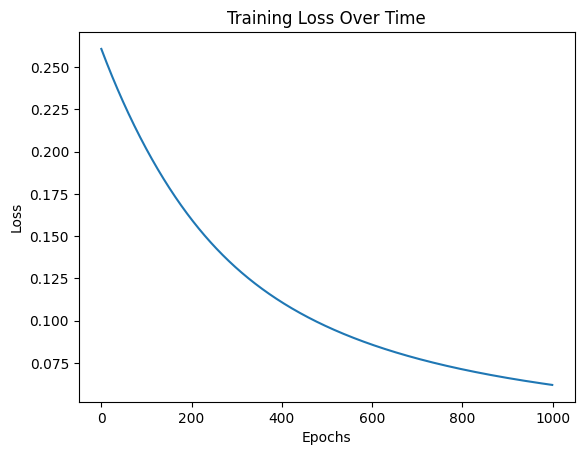

In [ ]:
# Инициализация параметров сети
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1

# Инициализация весов и смещений
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Функция активации (сигмоида)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Производная сигмоиды
def sigmoid_derivative(x):
    return x * (1 - x)

# Прямое распространение (forward pass)
def forward_pass(X):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

# Функция потерь (квадратичная ошибка)
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Обратное распространение (backward pass)
def backward_pass(X, y_true, Z1, A1, Z2, A2):
    m = y_true.shape[0]

    # Градиенты на выходном слое
    dZ2 = A2 - y_true
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # Градиенты на скрытом слое
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2

# Обновление весов
def update_weights(dW1, db1, dW2, db2, learning_rate):
    global W1, b1, W2, b2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# Обучение сети
learning_rate = 0.01
epochs = 1000
loss_history = []

for epoch in range(epochs):
    # Прямое распространение
    Z1, A1, Z2, A2 = forward_pass(X_train)

    # Вычисление ошибки
    loss = compute_loss(y_train, A2)
    loss_history.append(loss)

    # Обратное распространение
    dW1, db1, dW2, db2 = backward_pass(X_train, y_train, Z1, A1, Z2, A2)

    # Обновление весов
    update_weights(dW1, db1, dW2, db2, learning_rate)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Визуализация процесса обучения
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()


## Часть 2: Методы оптимизации и эксперименты
1. Применение методов оптимизации:
*  Постройте полносвязную нейронную сеть с двумя скрытыми
слоями (можно использовать датасет MNIST или другой).
*  Обучите её с использованием следующих оптимизаторов:
*  SGD (градиентный спуск)
*  Adam
*  RMSprop
*  Momentum
2. Эксперименты с параметрами:
*  Проведите обучение с различными параметрами learning rate (0.01, 0.1, 0.001) и размером мини-выборки (batch size 16, 32, 64).
*  Сравните скорость сходимости и итоговую точность на тестовой
выборке.
3. Визуализация:
*  Постройте графики изменения ошибки и точности на обучающей и
тестовой выборках для каждого метода оптимизации.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training with SGD
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6981 - loss: 1.0771 - val_accuracy: 0.9069 - val_loss: 0.3249
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9088 - loss: 0.3192 - val_accuracy: 0.9242 - val_loss: 0.2628
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9264 - loss: 0.2583 - val_accuracy: 0.9361 - val_loss: 0.2309
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9379 - loss: 0.2194 - val_accuracy: 0.9438 - val_loss: 0.1990
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9459 - loss: 0.1894 - val_accuracy: 0.9492 - val_loss: 0.1750
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9512 - loss: 0.1739 - val_accuracy: 0.9519 - val_loss: 0.1600
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9586 - loss: 0.1494 - val_accuracy: 0.9573 - val_loss: 0.1462
Epoch 8/10
1875/1875

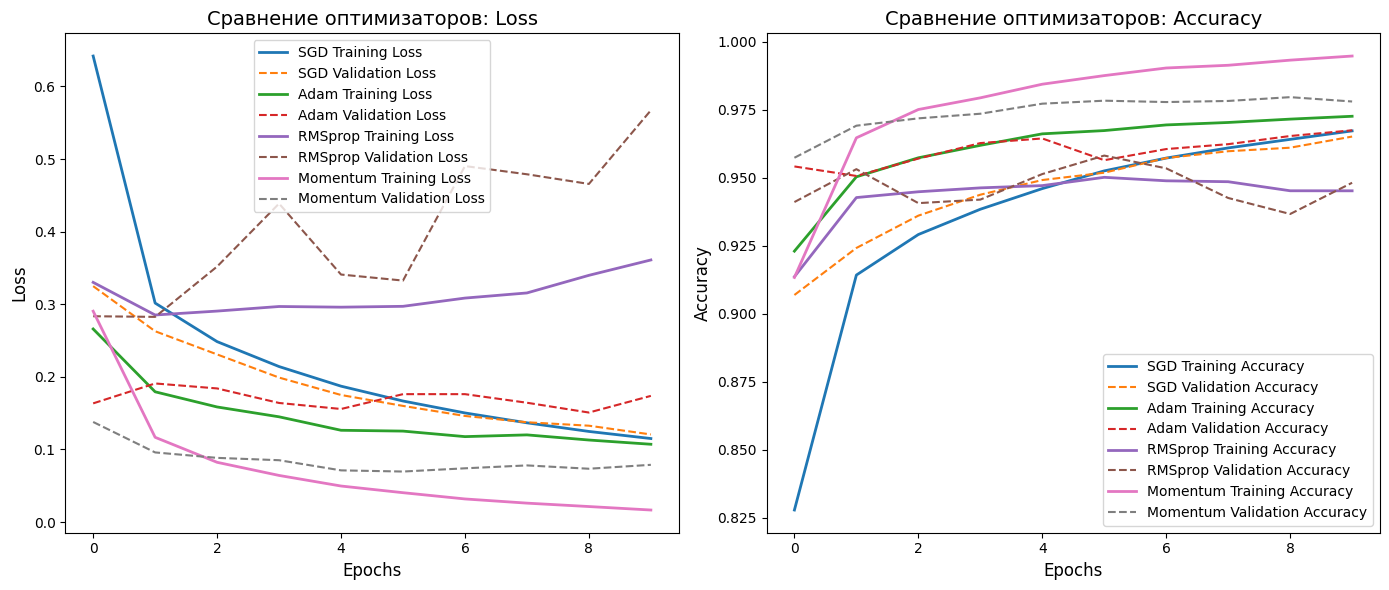

In [ ]:
# Загрузка данных MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Нормализация данных (приведение к диапазону [0, 1])
X_train = X_train / 255.0
X_test = X_test / 255.0

# Преобразование меток в one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Создание модели
def create_model(optimizer):
    model = Sequential([
        Input(shape=(28, 28)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Список оптимизаторов
optimizers = {
    'SGD': SGD(learning_rate=0.01),
    'Adam': Adam(learning_rate=0.01),
    'RMSprop': RMSprop(learning_rate=0.01),
    'Momentum': SGD(learning_rate=0.01, momentum=0.9)
}

# Обучение с разными оптимизаторами
history = {}
for name, optimizer in optimizers.items():
    model = create_model(optimizer)
    print(f"\nTraining with {name}")
    history[name] = model.fit(X_train, y_train, epochs=10, batch_size=32,
                             validation_data=(X_test, y_test), verbose=1)

# Создание полного датафрейма с результатами
full_results = []
for name, hist in history.items():
    for epoch in range(len(hist.history['loss'])):
        full_results.append({
            'Optimizer': name,
            'Epoch': epoch + 1,
            'Train Loss': hist.history['loss'][epoch],
            'Val Loss': hist.history['val_loss'][epoch],
            'Train Acc': hist.history['accuracy'][epoch],
            'Val Acc': hist.history['val_accuracy'][epoch]
        })

df_full = pd.DataFrame(full_results)
print("\nПолные результаты обучения:")
print(df_full.tail(8))  # Показываем последние 8 строк (по 2 эпохи для каждого оптимизатора)

# Сводная таблица по последней эпохе
summary_df = df_full[df_full['Epoch'] == 10]
print("\nСравнительная таблица на 10-й эпохе:")
print(summary_df[['Optimizer', 'Train Loss', 'Val Loss', 'Train Acc', 'Val Acc']]
      .to_markdown(index=False))

# Эксперименты с Momentum (как лучшим оптимизатором)
print("\nЭксперименты с Momentum (лучший оптимизатор):")
learning_rates = [0.1, 0.01, 0.001]
batch_sizes = [16, 32, 64]

momentum_results = []
for lr in learning_rates:
    for batch_size in batch_sizes:
        model = create_model(SGD(learning_rate=lr, momentum=0.9))
        print(f"\nTraining Momentum with lr={lr}, batch={batch_size}")
        hist = model.fit(X_train, y_train, epochs=10, batch_size=batch_size,
                        validation_data=(X_test, y_test), verbose=1)
        momentum_results.append({
            'Learning Rate': lr,
            'Batch Size': batch_size,
            'Final Val Acc': hist.history['val_accuracy'][-1]
        })

momentum_df = pd.DataFrame(momentum_results)
print("\nРезультаты экспериментов с Momentum:")
print(momentum_df.to_markdown(index=False))

# Визуализация результатов
plt.figure(figsize=(14, 6))

# График потерь
plt.subplot(1, 2, 1)
for name, hist in history.items():
    plt.plot(hist.history['loss'], label=f'{name} Training Loss', linewidth=2)
    plt.plot(hist.history['val_loss'], '--', label=f'{name} Validation Loss')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Сравнение оптимизаторов: Loss', fontsize=14)
plt.legend()

# График точности
plt.subplot(1, 2, 2)
for name, hist in history.items():
    plt.plot(hist.history['accuracy'], label=f'{name} Training Accuracy', linewidth=2)
    plt.plot(hist.history['val_accuracy'], '--', label=f'{name} Validation Accuracy')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Сравнение оптимизаторов: Accuracy', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()